In [ ]:
#importing liblaries
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


DATA UNDERSTANDING

In [ ]:
file_path = "C:\\Users\\HP\\Desktop\\terry dtops data\\Terry_Stops_20240301.csv"
df = pd.read_csv(file_path)

df

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
df.columns

In [ ]:
# Iterating over columns to identify categorical variables
for column in df.columns:
    if df[column].dtype == 'object':
        unique_values = df[column].unique()
        print(f"Unique values for {column}: {unique_values}")

In [ ]:
df.describe()

In [ ]:
#checking for null values
missing_values = df.isnull().sum()
missing_values

In [ ]:
# Checking for NaN values in the DataFrame
nan_values = df.isna().sum()

# Display columns with NaN values and their respective counts
print("Columns with NaN values:")
print(nan_values[nan_values > 0])


### Feature engineering 

In [ ]:

# Creating a new feature indicating whether a weapon was involved in the stop
df['Weapon Involved'] = df['Weapon Type'].notnull().astype(int)


# Creating a new feature representing the geographical area of the stop by combining "Precinct", "Sector", and "Beat"
df['Geographical Area'] = df['Precinct'] + '-' + df['Sector'] + '-' + df['Beat']

print(df.head())


In [21]:
df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Arrest Flag,Frisk Flag,Precinct,Sector,Beat,Weapon Involved,Geographical Area,Age_Gender,Race_CallType,Age_Race
0,36 - 45,-1,20160000157346,152518,Arrest,Lethal Cutting Instrument,6092,1956,M,Hispanic or Latino,...,N,Y,Southwest,W,W1,1,Southwest-W-W1,36 - 45_M,Hispanic or Latino_911,36 - 45_Hispanic or Latino
1,1 - 17,-1,20150000314276,80366,Arrest,NaN,7556,1982,M,White,...,N,N,West,Q,Q3,0,West-Q-Q3,1 - 17_M,White_ONVIEW,1 - 17_White
2,18 - 25,-1,20180000027784,381908,Arrest,NaN,5436,1963,M,White,...,N,N,Southwest,W,W1,0,Southwest-W-W1,18 - 25_M,White_911,18 - 25_White
3,18 - 25,-1,20160000438058,217923,Offense Report,NaN,7713,1982,M,White,...,N,N,North,J,J2,0,North-J-J2,18 - 25_M,White_911,18 - 25_White
4,26 - 35,-1,20150000198610,53289,Offense Report,NaN,5833,1969,M,White,...,N,N,North,N,N3,0,North-N-N3,26 - 35_M,White_911,26 - 35_White


In [ ]:

#interaction terms between officers race and call type
df['Race_CallType'] = df['Officer Race'] + '_' + df['Call Type']

print(df.head())


In [ ]:
df.head()

### Data Analysis and exploration

Getting the relevant collumns for my analysis

In [24]:

selected_columns = ['Officer Race', 'Subject Perceived Race', 'Stop Resolution', 'Geographical Area','Weapon Involved']
race_relationship_data = df[selected_columns]

race_relationship_data.head()

,Officer Race,Subject Perceived Race,Stop Resolution,Geographical Area,Weapon Involved
0,Hispanic or Latino,White,Arrest,Southwest-W-W1,1
1,White,White,Arrest,West-Q-Q3,0
2,White,White,Arrest,Southwest-W-W1,0
3,White,White,Offense Report,North-J-J2,0
4,White,Black or African American,Offense Report,North-N-N3,0


In [25]:
race_relationship_data.dtypes

Officer Race              object
Subject Perceived Race    object
Stop Resolution           object
Geographical Area         object
Weapon Involved            int32
dtype: object

### Race composition for officers and subject involved

c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


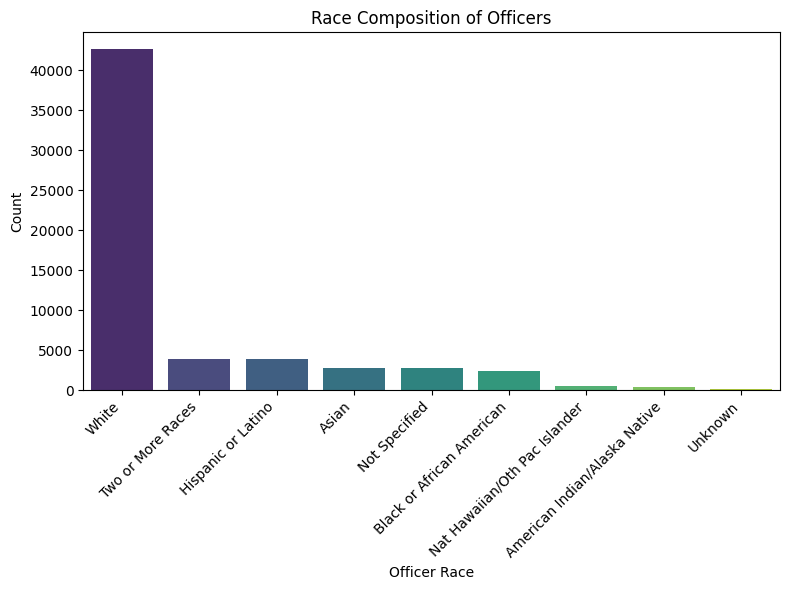

In [27]:
race_counts = race_relationship_data['Officer Race'].value_counts()

# Plotting the race composition
plt.figure(figsize=(8, 6))
sns.barplot(x=race_counts.index, y=race_counts.values, palette='viridis')
plt.title('Race Composition of Officers')
plt.xlabel('Officer Race')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()


c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


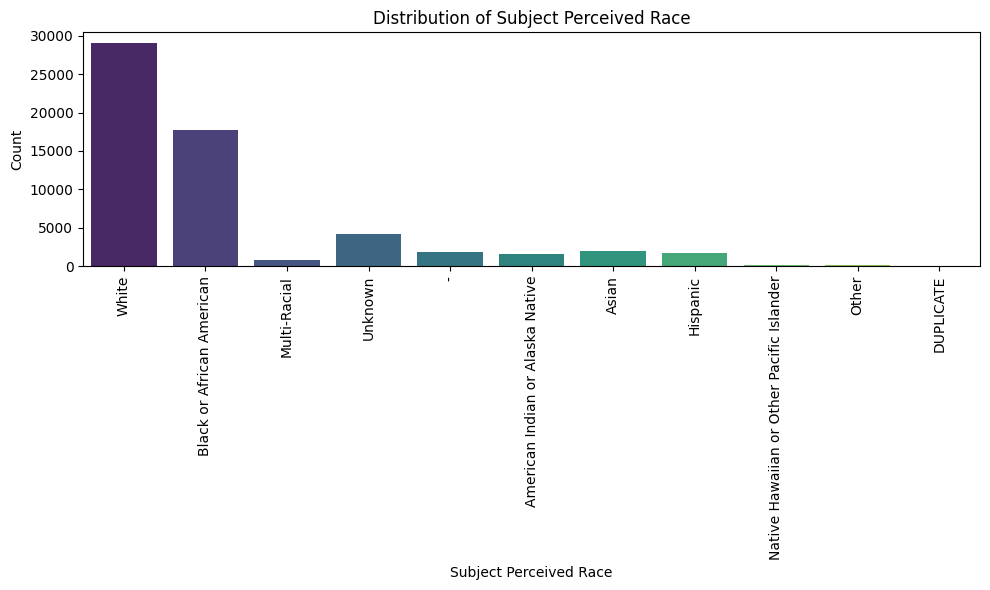

In [28]:
# Plotting the distribution of subject perceived race with rotated labels
plt.figure(figsize=(10, 6))
sns.countplot(x='Subject Perceived Race', data=race_relationship_data, palette='viridis')
plt.title('Distribution of Subject Perceived Race')
plt.xlabel('Subject Perceived Race')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

### Relationship between office and subject by race

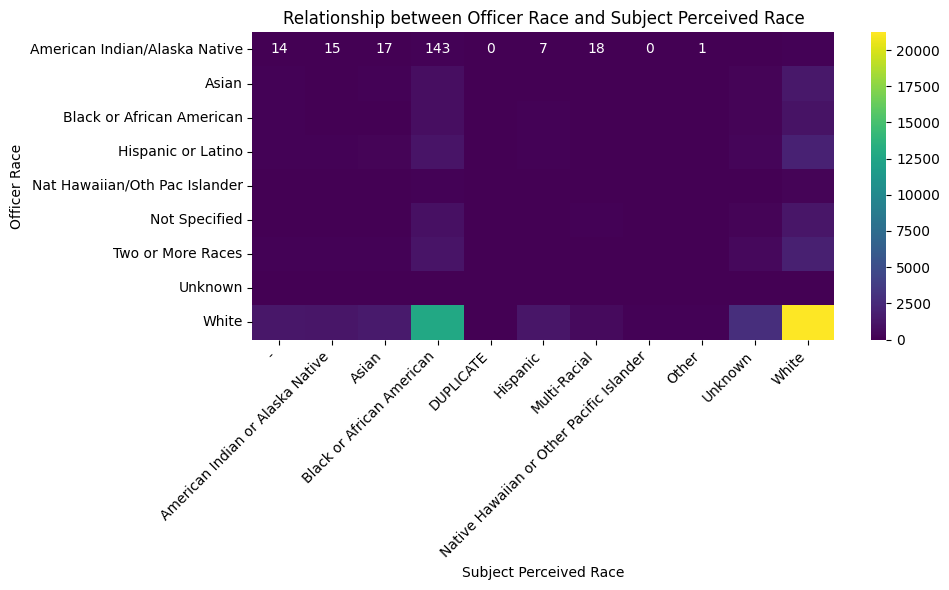

In [29]:

# i'm Creating a pivot table to count occurrences of each combination of races
pivot_table = race_relationship_data.pivot_table(index='Officer Race', columns='Subject Perceived Race', aggfunc='size', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='viridis')
plt.title('Relationship between Officer Race and Subject Perceived Race')
plt.xlabel('Subject Perceived Race')
plt.ylabel('Officer Race')
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0, va='center')  
plt.tight_layout()  
plt.show()